<a href="https://colab.research.google.com/github/arthurmls/quant-notebooks/blob/main/Backtesting_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Télécharger les données Apple
df = yf.download('AAPL', start='2020-01-01', end= '2024-12-31')

# ça fonctionne même si yfinance renvoie un DataFrame multi-niveaux
df.columns = df.columns.droplevel('Ticker')
df.dropna(inplace=True)
df.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_29460\3447414071.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2020-01-01', end= '2024-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.620842,72.681289,71.373218,71.627092,135480400
2020-01-03,71.914803,72.676431,71.689942,71.847102,146322800
2020-01-06,72.487846,72.526533,70.783248,71.034709,118387200
2020-01-07,72.146942,72.753823,71.926915,72.497529,108872000
2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200


In [ ]:
df["SMA20"] = df["Close"].rolling(window=20).mean()
df["SMA50"] = df["Close"].rolling(window=50).mean()

In [ ]:
df["Signal"] = 0
df.loc[df["SMA20"] > df["SMA50"], "Signal"] = 1
df.loc[df["SMA20"] < df["SMA50"], "Signal"] = 0

In [ ]:
df.head()

Price,Close,High,Low,Open,Volume,SMA20,SMA50,Signal
Date,,,,,,,,
2020-01-02,72.620842,72.681289,71.373218,71.627092,135480400,NaN,NaN,0
2020-01-03,71.914803,72.676431,71.689942,71.847102,146322800,NaN,NaN,0
2020-01-06,72.487846,72.526533,70.783248,71.034709,118387200,NaN,NaN,0
2020-01-07,72.146942,72.753823,71.926915,72.497529,108872000,NaN,NaN,0
2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200,NaN,NaN,0


In [ ]:
df.tail()

Price,Close,High,Low,Open,Volume,SMA20,SMA50,Signal
Date,,,,,,,,
2024-12-23,254.655716,255.034791,252.840088,254.156919,40858800,244.437349,234.713736,1
2024-12-24,257.578674,257.588630,254.675658,254.875189,23234700,245.700803,235.255513,1
2024-12-26,258.396667,259.474086,257.010028,257.568678,27237100,246.895920,235.762829,1
2024-12-27,254.974930,258.077462,252.451019,257.209530,42355300,247.926434,236.242965,1
2024-12-30,251.593079,252.889953,250.146571,251.623005,35557500,248.668145,236.648091,1


In [ ]:
df["Position"] = df["Signal"].diff()
df[["Close", "SMA20", "SMA50", "Signal", "Position"]].tail()

Price,Close,SMA20,SMA50,Signal,Position
Date,,,,,
2024-12-23,254.655716,244.437349,234.713736,1,0.0
2024-12-24,257.578674,245.700803,235.255513,1,0.0
2024-12-26,258.396667,246.895920,235.762829,1,0.0
2024-12-27,254.974930,247.926434,236.242965,1,0.0
2024-12-30,251.593079,248.668145,236.648091,1,0.0


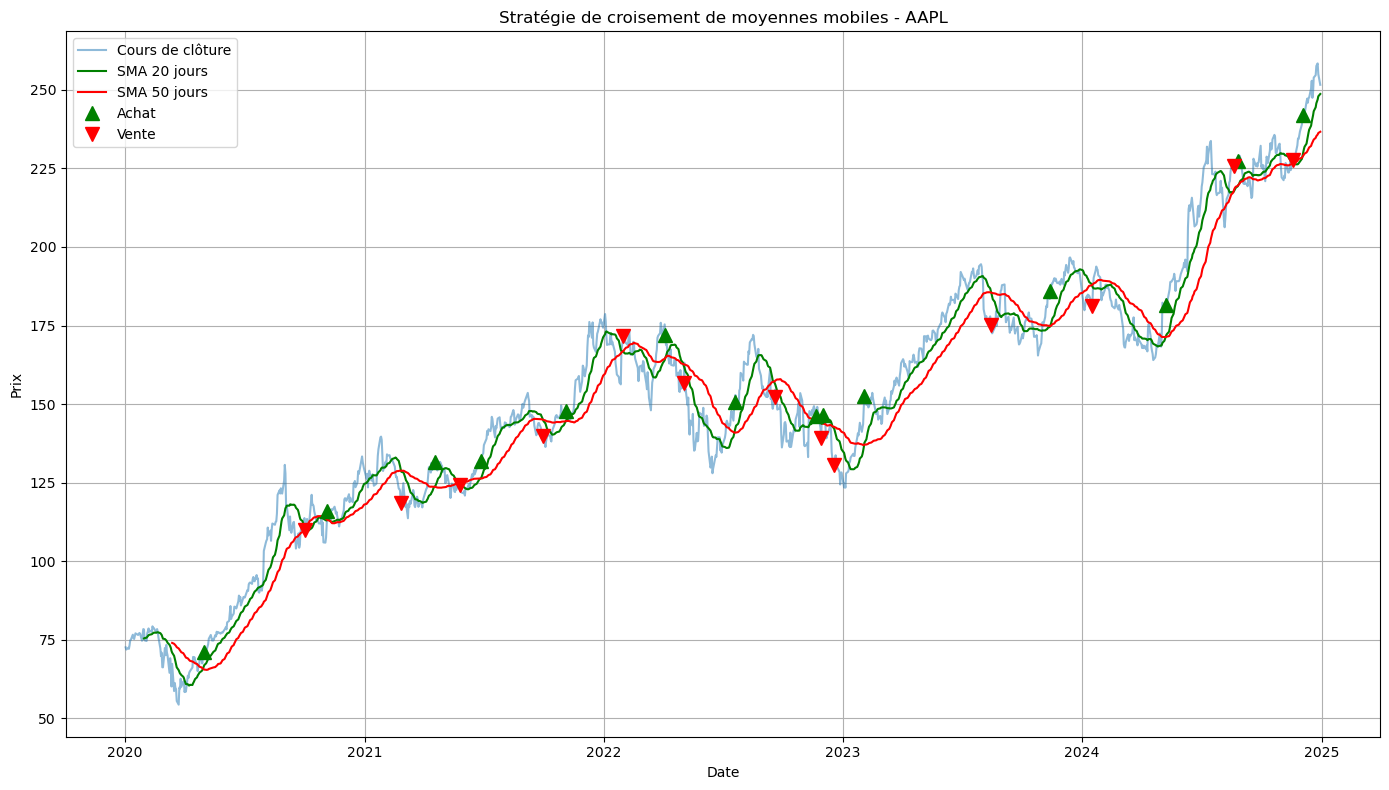

In [ ]:

# 4. Tracer le graphique
plt.figure(figsize=(14, 8))
plt.plot(df["Close"], label='Cours de clôture', alpha=0.5)
plt.plot(df["SMA20"], label='SMA 20 jours', color='green')
plt.plot(df["SMA50"], label='SMA 50 jours', color='red')

# Points d'achat
plt.plot(df[df["Position"] == 1].index, df['Close'][df["Position"] == 1], '^', color='green', markersize=10, label='Achat')

# Points de vente
plt.plot(df[df["Position"] == -1].index, df["Close"][df["Position"] == -1], 'v', color='red', markersize=10, label='Vente')

plt.title("Stratégie de croisement de moyennes mobiles - AAPL")
plt.xlabel("Date")
plt.ylabel("Prix")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
!pip install backtrader --quiet

In [ ]:
import backtrader as bt

In [ ]:
df

Price,Close,High,Low,Open,Volume,SMA20,SMA50,Signal,Position
Date,,,,,,,,,
2020-01-02,72.620842,72.681289,71.373218,71.627092,135480400,NaN,NaN,0,NaN
2020-01-03,71.914803,72.676431,71.689942,71.847102,146322800,NaN,NaN,0,0.0
2020-01-06,72.487846,72.526533,70.783248,71.034709,118387200,NaN,NaN,0,0.0
2020-01-07,72.146942,72.753823,71.926915,72.497529,108872000,NaN,NaN,0,0.0
2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200,NaN,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...
2024-12-23,254.655716,255.034791,252.840088,254.156919,40858800,244.437349,234.713736,1,0.0
2024-12-24,257.578674,257.588630,254.675658,254.875189,23234700,245.700803,235.255513,1,0.0
2024-12-26,258.396667,259.474086,257.010028,257.568678,27237100,246.895920,235.762829,1,0.0


In [ ]:
# On ne garde que les colonnes nécessaires pour le trading
data =df[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
data.dropna(inplace=True) # On supprime les lignes incomplètes

# Backtrader préfère les noms de colonnes en minuscules
data.columns = [col.lower() for col in data.columns]

# On remet l'index 'Date' sous forme de colonne pour Backtrader
data.reset_index(inplace=True)
data

,Date,open,high,low,close,volume
0,2020-01-02,71.627092,72.681289,71.373218,72.620842,135480400
1,2020-01-03,71.847102,72.676431,71.689942,71.914803,146322800
2,2020-01-06,71.034709,72.526533,70.783248,72.487846,118387200
3,2020-01-07,72.497529,72.753823,71.926915,72.146942,108872000
4,2020-01-08,71.849533,73.609745,71.849533,73.307510,132079200
...,...,...,...,...,...,...
1252,2024-12-23,254.156919,255.034791,252.840088,254.655716,40858800
1253,2024-12-24,254.875189,257.588630,254.675658,257.578674,23234700
1254,2024-12-26,257.568678,259.474086,257.010028,258.396667,27237100
1255,2024-12-27,257.209530,258.077462,252.451019,254.974930,42355300


In [ ]:
# Un Data Feed", c'est un connecteur entre vos données pandas et Backtrader.
# Il lui explique comment lire la colonne 'Date', 'Open', etc. deuis le DataFrame.
class PandasData(bt.feeds.PandasData):
    params = (
        ('datetime', 'Date'),        # Indique la colonne utilisée comme date
        ('open', 'open'),
        ('high', 'high'),
        ('low', 'low'),
        ('close', 'close'),
        ('volume', 'volume'),
        ('openinterest', -1),        # Pas utilisé ici, on le désactive avec -1
    )



In [ ]:
class SMACrossStrategy(bt.Strategy):
    params = (
        ('sma_short', 20),   # période pour la moyenne mobile courte
        ('sma_long', 50),   # période pour la moyenne mobile longue
    )

    def __init__(self):
        # Calcul des deux moyennes mobiles
        self.sma_short = bt.ind.SMA(period=self.params.sma_short)
        self.sma_long = bt.ind.SMA(period=self.params.sma_long)

        # Détecter les croisements entre les deux SMA (cross up ou down)
        self.crossover = bt.ind.CrossOver(self.sma_short, self.sma_long)

        def next(self):
            # Cette méthode s'exécute à chaque nouvelle bougie (jour)
            if not self.position:
                # Si on n'a pas de position (ni achat, ni vente)
                if self.crossover > 0:
                    self.buy()  # Croisement haussier -> on achète
                elif self.crossover < 0:
                    self.sell()  # Croisement baissier -> on revend tout

In [ ]:
cerebro = bt.Cerebro()  # Le moteur de backtest de Backtrader
cerebro.addstrategy(SMACrossStrategy)  # Ajout de notre stratégie dans le moteur

# Création du "data feed" à partir du DataFrame qu'on a préparé
data_feed = PandasData(dataname=data)

# Ajout des données au moteur de simulation
cerebro.adddata(data_feed)

# Définir le capital initial
cerebro.broker.set_cash(10000.0)

# Affichage du capital avant simulation
print(f" Capital initial : {cerebro.broker.getvalue():.2f} $")

 Capital initial : 10000.00 $


In [ ]:
cerebro.run()

In [ ]:
# Affichage du capital après simulation
print(f" Capital final : {cerebro.broker.getvalue():.2f} $")

 Capital final : 10000.00 $


In [ ]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(data.index)

RangeIndex(start=0, stop=1257, step=1)


In [ ]:
print(data.columns)

Index(['Date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')


In [ ]:
def notify_order(self, order):
    if order.status in [order.Completed]:
        if order.isbuy():
            print(f" ACHAT exécuté le {self.datas[0].datetime.date(0)} au prix {order.executed.price}")
        elif order.issell():
            print(f" VENTE exécutée le {self.datas[0].datetime.date(0)} au prix {order.executed.price}")